### Import Libraries

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Import data

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Model Building

#### Input Image

In [4]:
input_img= Input(shape=(784,))

#### Encoded and Decoded Layers of the autoencoders

In [5]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)

decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#### Autoencoder model

In [6]:
autoencoder=Model(input_img, decoded)

#### encoder extraction

In [7]:
encoder = Model(input_img, encoded)

#### compiling the autoencoder

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

#### Fit data to the model

In [9]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.3355 - acc: 0.7523 - val_loss: 0.2630 - val_acc: 0.7879
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2554 - acc: 0.7954 - val_loss: 0.2451 - val_acc: 0.7943
Epoch 3/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2364 - acc: 0.7947 - val_loss: 0.2261 - val_acc: 0.7909
Epoch 4/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2160 - acc: 0.7945 - val_loss: 0.2070 - val_acc: 0.7910
Epoch 5/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1993 - acc: 0.7961 - val_loss: 0.1926 - val_acc: 0.7984
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1893 - acc: 0.7973 - val_loss: 0.1843 - val_acc: 0.7982
Epoch 7/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.1830 - acc: 0.7981 - val_loss: 0.1780 - 

60000/60000 [==============================] - 5s 80us/step - loss: 0.1073 - acc: 0.8123 - val_loss: 0.1090 - val_acc: 0.8103
Epoch 60/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.1070 - acc: 0.8123 - val_loss: 0.1061 - val_acc: 0.8124
Epoch 61/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1066 - acc: 0.8124 - val_loss: 0.1042 - val_acc: 0.8122
Epoch 62/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1060 - acc: 0.8125 - val_loss: 0.1055 - val_acc: 0.8114
Epoch 63/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.1058 - acc: 0.8125 - val_loss: 0.1055 - val_acc: 0.8118
Epoch 64/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1054 - acc: 0.8125 - val_loss: 0.1044 - val_acc: 0.8113
Epoch 65/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.1052 - acc: 0.8126 - val_loss: 0.1062 - val_acc: 0.8110
Epoch 66/100
60000/60000 [==============

#### reconstruct the image from model

In [11]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

#### plot the predicted and original images

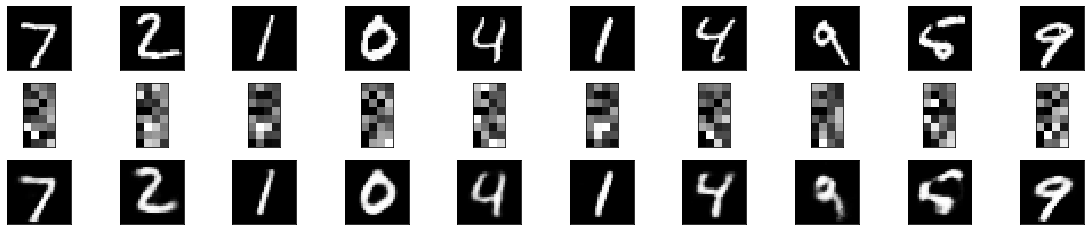

In [12]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()